## Astrocytes

525 525 3


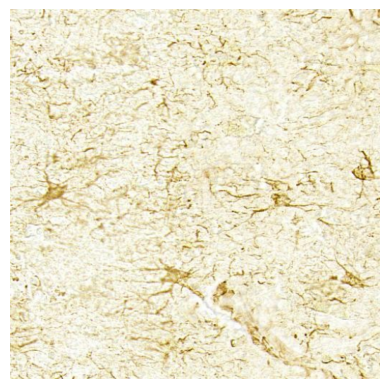

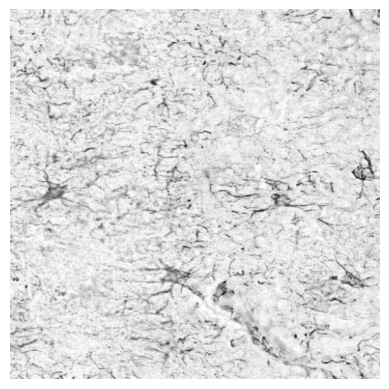

In [497]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import  os
path="/home/htic/Desktop/raisa/astrocytes/astrocyte-detection/training media/image/"
tile_name="/tile_26624_173568.jpeg"
#resize
img = cv2.imread("/home/htic/Desktop/raisa/astrocytes/astrocyte_media"+tile_name)
cv2.imwrite("/home/htic/Desktop/raisa/astrocytes/astrocyte-detection/training-media/image-new"+tile_name,img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height,width,channels=img.shape
#print(f"{height} {width} {channels}")
#525 527 3

img=cv2.resize(img,(525,525))
height,width,channels=img.shape
print(f"{height} {width} {channels}")

#rgb image
plt.imshow(img)
plt.axis('off')
plt.show()

#grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

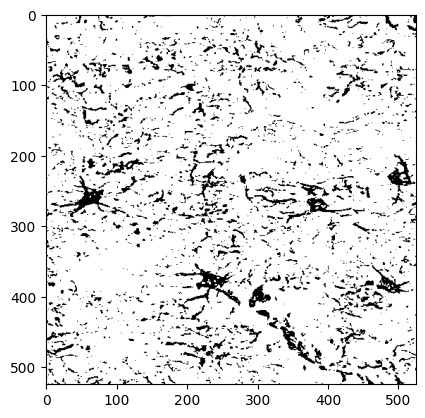

In [498]:
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(img_gray) + 20, 0, 255).astype(np.uint8)
_, threshold_img = cv2.threshold(img_gray, 195, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

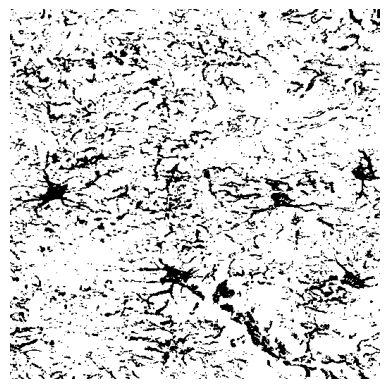

In [499]:

_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(otsu_thresh,cmap='gray')

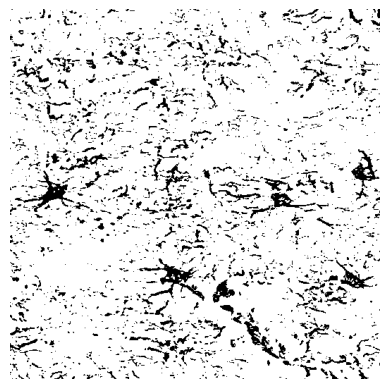

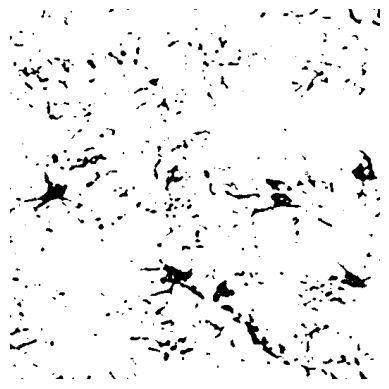

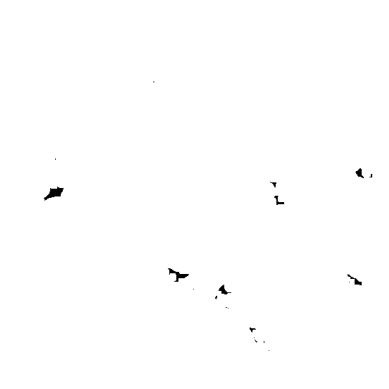

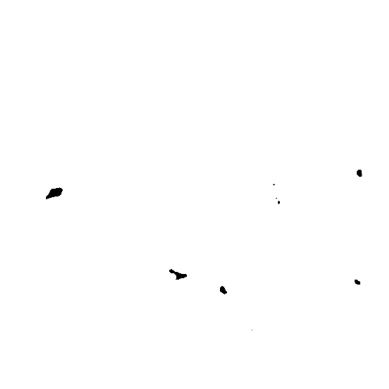

In [508]:
output=threshold_img.copy()
median_blurred = cv2.medianBlur(output, 5)

kernel = np.ones((7,7), np.uint8)
eroded_image = cv2.erode(~median_blurred, kernel, iterations=1)

median_blurred2 = cv2.medianBlur(eroded_image,7)

plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(median_blurred,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~eroded_image,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(~median_blurred2,cmap='gray')
median_blurred2_array=np.array(median_blurred2)
plt.axis('off')
plt.show()

(525, 525, 3)


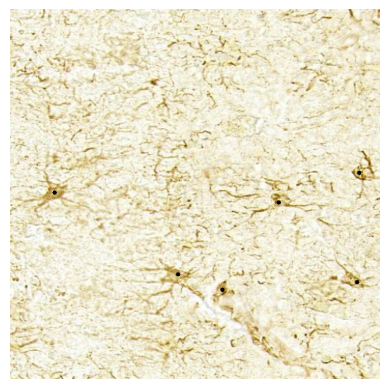

In [509]:
centroid_img=img.copy()
contours, hierarchy = cv2.findContours(median_blurred2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
centres=[]
contours = [c for c in contours if cv2.contourArea(c) > 1.0]
for c in contours:
   
   M = cv2.moments(c)
 
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])
   cv2.circle(centroid_img, (cX, cY), 3, (0, 0, 0), -1)
   centres.append((cX, cY))

print(centroid_img.shape)
plt.imshow(centroid_img,cmap='gray')
plt.axis('off')
plt.show()

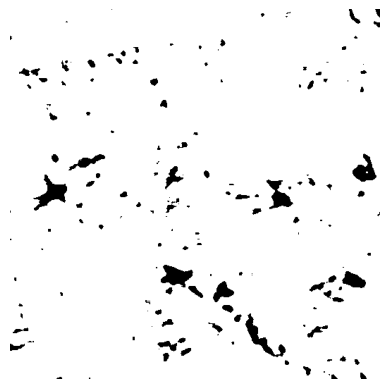

(525, 525)


In [510]:
_, threshold_img2 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)
floodfill=threshold_img2.copy()
floodfill_blurred = cv2.medianBlur(floodfill, 9)
plt.imshow(floodfill_blurred,cmap='gray')
plt.axis('off')
plt.show()

floodfill_blurred_array=np.array(floodfill_blurred)
print(floodfill_blurred_array.shape)


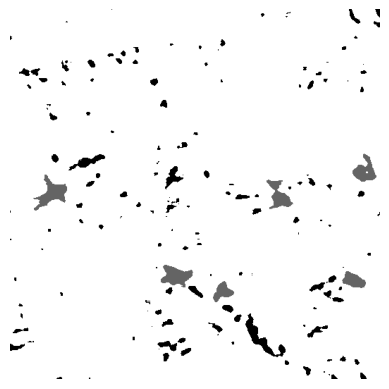

In [511]:
#bfs flood fill 4-connected

from collections import deque

def flood_fill_multi_source(grid, sources, new_color):
    rows, cols = len(grid), len(grid[0])
    original_color = 0
    
    queue = deque()
    
    for x, y in sources:
        grid[x][y] = 100
        queue.append((x, y))
    
    while queue:
        x, y = queue.popleft()
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == original_color:
                grid[nx][ny] = new_color  
                queue.append((nx, ny))
        
    
    return grid


grid = floodfill_blurred_array.copy()
sources = [(y, x) for x, y in centres]

for x, y in sources:
    grid[x][y]=0
    
new_color = 100

result = flood_fill_multi_source(grid, sources, new_color)

#count= 3263
  



    
plt.imshow(result,cmap='gray')
plt.axis('off')  
plt.show()

True

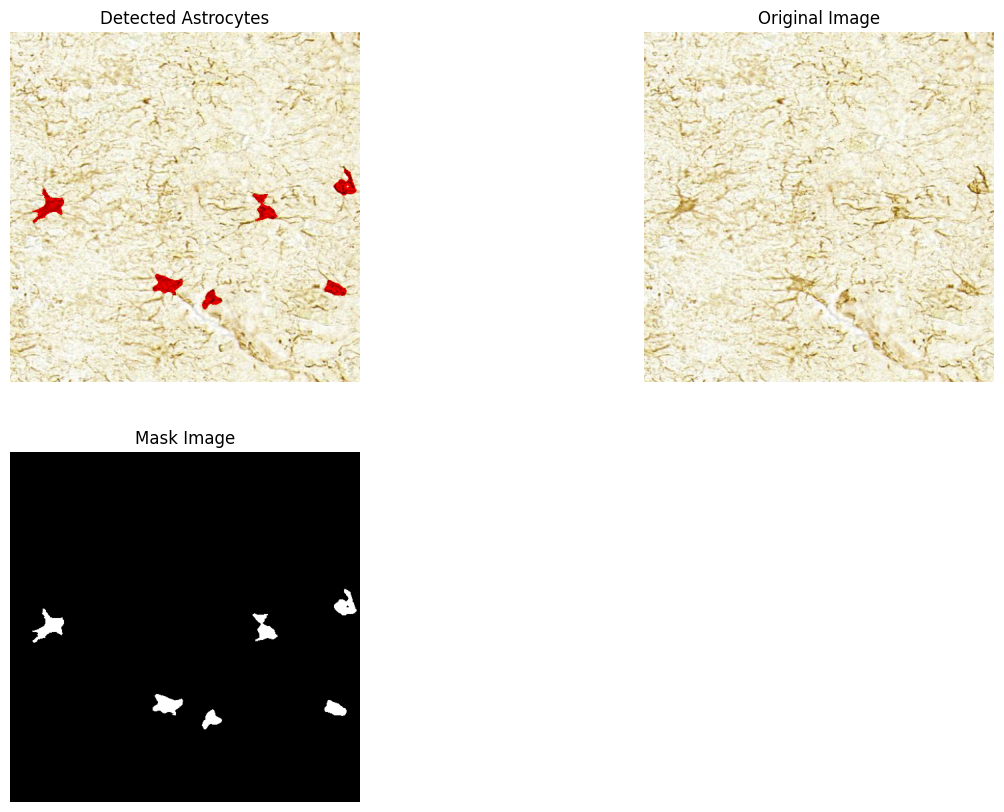

In [512]:
img_copy=np.array(img.copy())
mask=np.array(result.copy())
coloured_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask_astrocytes= np.where(coloured_mask==[100,100,100], [255,0,0], [255,255,255]).astype(np.uint8)

mask = np.where(result == 100, 255, 0).astype(np.uint8)

masked_img= cv2.bitwise_and(img_copy, mask_astrocytes)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(masked_img)
plt.axis('off')
plt.title("Detected Astrocytes")
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(img)
plt.axis('off')
plt.title("Original Image")
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(mask,cmap='gray')
plt.axis('off')
plt.title("Mask Image")
masked_img = cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR)
cv2.imwrite("/home/htic/Desktop/raisa/astrocytes/astrocyte-detection/training-media/mask-new"+tile_name, mask)
